## Project 1: Euler Method


#### Abstract & Description

This project is about familiarizing students with the Euler method. This a method used to solve scientific problems. It is merely about predicting the future. It is named after Leonhard Euler, who was a Swiss mathematician. This a numerical method to solve first order differential equations. It is important to mention that the predictions obtained are mere estimations.
    
For this project, we will use the Euler method to estimate the parameters of the following free fall model :
$$bv^2-mg = m(dv/dt)$$

#### Algorithm & Discussion

The general form of the equation is: 
$$yf = yn + (dy/dt)*\Delta t$$

yf: The value of the function in the future.

yn: The value of the function now.

dy/dt: The value of the derivative at any instant t.

Delta_t: change in time arbitrarly picked. However, it is important to pick a small change in time in order to maximize the accuracy. The smaller Delta_tis, the more accurate is yf.


#### How did Euler end up with this method?

    * There is a very simple demonstration that most people use to explain this.
    we all know that the slope equals:
    
$$ (dy/dx) = m = (y2 - y1)/(x2 - x1)$$
    
    Let's use t as the time constant instead x. The formula of the slope becomes:

$$ (dy/dt) = m = (y2 - y1)/(t2 - t1)$$

* We also know that:
    $$(t2 - t1) = \Delta t$$ 
    
    Which means:
    
    $$(y2 - y1) = (dy/dt)*\Delta t$$
    
    Which is just:
    $$ y2 = y1 + (dy/dt)*\Delta t$$
    
 #### How do we predict the future after x amount of time?
 
 We proceed with iterations. For example, if you want to compute the value of the function after 20s with a picked dt of 0.5s, that means you will have to run the same code 40 times. We always need to know y0, which is the value of the function at time t=0.  This implies that:
 
 
 * yf can be written as y(t+ds)
 * yn can be written as y(t).

 

#### Implementation/Code & Results

A man drops coffee filters from a certain height and collects time and height at various instant. 
Here is what we obtained:


In [1]:
data = """0.000000000E0	-2.688162330E0
3.336670003E-2	-4.301059729E0
6.673340007E-2	-5.376324661E0
1.001001001E-1	-6.989222059E0
1.334668001E-1	-1.129028179E1
1.668335002E-1	-1.451607658E1
2.002002002E-1	-2.043003371E1
2.335669002E-1	-2.526872591E1
2.669336003E-1	-3.118268303E1
3.003003003E-1	-3.870953756E1
3.336670003E-1	-4.623639208E1
3.670337004E-1	-5.430087907E1
4.004004004E-1	-6.236536606E1
4.337671004E-1	-7.150511799E1
4.671338005E-1	-8.010723744E1
5.005005005E-1	-8.924698937E1
5.338672005E-1	-9.892437376E1
5.672339006E-1	-1.080641257E2
6.006006006E-1	-1.177415101E2
6.339673006E-1	-1.274188945E2
6.673340007E-1	-1.370962788E2
7.007007007E-1	-1.467736632E2
7.340674007E-1	-1.575263126E2
7.674341008E-1	-1.672036969E2
8.008008008E-1	-1.768810813E2
8.341675008E-1	-1.865584657E2
8.675342009E-1	-1.973111150E2
9.009009009E-1	-2.075261319E2
9.342676009E-1	-2.182787812E2
9.676343010E-1	-2.284937981E2
""".splitlines()  # split this string on the "newline" character.

print("We have", len(data), "data points.")



We have 30 data points.


In [2]:
%pylab

#
# Here we'll take the list of strings defined above and break it into actual numbers in reasonable units.
#

tlist = []
ylist = []
for s in data:
    t,y = s.split()     # break string in two
    t=float(t)          # convert time to float
    y=float(y)/100.0    # convert distanct (in meters) to float
    tlist.append(t)
    ylist.append(y)
        
print ("tlist=",tlist)
print ("ylist=",ylist)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
tlist= [0.0, 0.03336670003, 0.06673340007, 0.1001001001, 0.1334668001, 0.1668335002, 0.2002002002, 0.2335669002, 0.2669336003, 0.3003003003, 0.3336670003, 0.3670337004, 0.4004004004, 0.4337671004, 0.4671338005, 0.5005005005, 0.5338672005, 0.5672339006, 0.6006006006, 0.6339673006, 0.6673340007, 0.7007007007, 0.7340674007, 0.7674341008, 0.8008008008, 0.8341675008, 0.8675342009, 0.9009009009, 0.9342676009, 0.967634301]
ylist= [-0.0268816233, -0.04301059729, -0.05376324661, -0.06989222059, -0.1129028179, -0.1451607658, -0.2043003371, -0.2526872591, -0.3118268303, -0.3870953756, -0.4623639208, -0.5430087907, -0.6236536606, -0.7150511799, -0.8010723744, -0.8924698937, -0.9892437376, -1.0806412570000001, -1.177415101, -1.274188945, -1.370962788, -1.4677366319999998, -1.575263126, -1.672036969, -1.768810813, -1.865584657, -1.97311115, -2.075261319, -2.182787812, -2.284937981]


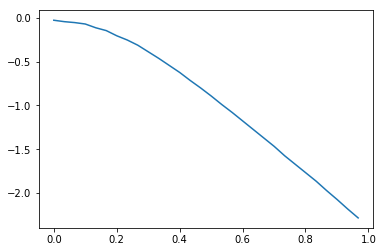

In [3]:
plot(tlist, ylist) # plot the the collected data

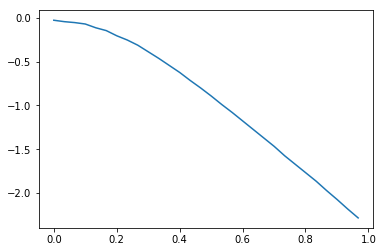

In [4]:
plot(tlist, ylist) 

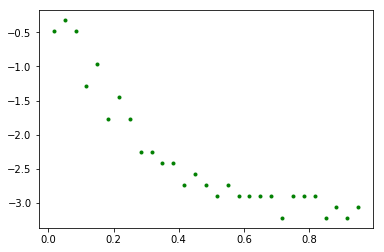

In [5]:
vlist = []  # Velocity list (computed velocities from experimental data)
tvlist = []  # time list (times for corresponding velocities)
for i in range(1,len(tlist)):
    dy=ylist[i]-ylist[i-1]
    dt=tlist[i]-tlist[i-1]
    vlist.append(dy/dt)
    tvlist.append((tlist[i]+tlist[i-1])/2.0)
    
plot(tvlist,vlist,'g.')


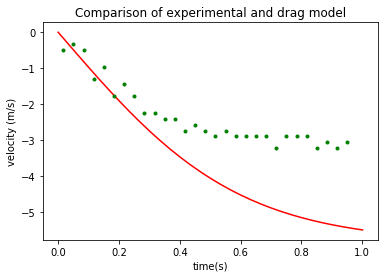

In [6]:
m=0.0035  # kg
g=9.8     # m/s
b=0.001    # total guess, need to improve

v=0.0     # start with zero velocity

dt = (tlist[-1]-tlist[0])/(len(tlist)-1)  # time per frame in original video
t=0.0

vclist = [v]
tclist = [t]

def deriv(v, t):
    return b*v**2/m - g

for i in range(len(tlist)):
    dv = deriv(v,t)*dt
    v += dv
    t += dt
    
    vclist.append(v)
    tclist.append(t)
    
title("Comparison of experimental and drag model")
xlabel("time(s)")
ylabel("velocity (m/s)")
plot(tclist, vclist, 'r-',tvlist,vlist,'g.')

##### Remark 

After many iterations, we end up with b = 0.003625 +/- 0.000375. Within this range, we obtain a good fiting curve.

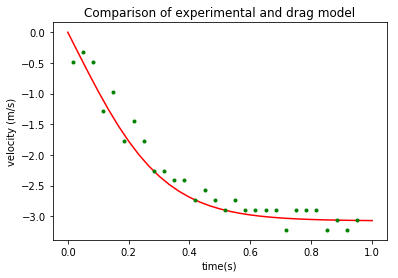

In [19]:
m=0.0035  # kg
g=9.8     # m/s
b=0.003625    # total guess, need to improve

v=0.0     # start with zero velocity

dt = (tlist[-1]-tlist[0])/(len(tlist)-1)  # time per frame in original video
t=0.0

vclist = [v]
tclist = [t]

def deriv(v, t):
    return b*v**2/m - g

for i in range(len(tlist)):
    dv = deriv(v,t)*dt
    v += dv
    t += dt
    
    vclist.append(v)
    tclist.append(t)
    
title("Comparison of experimental and drag model")
xlabel("time(s)")
ylabel("velocity (m/s)")
plot(tclist, vclist, 'r-',tvlist,vlist,'g.')

### Conclusion

$$bv^2-mg = m(dv/dt)$$
The obtained curve changes only if we modify b. This is because all the other values are already fixed or computed by the program. By changing b, the curves tends to fit within the dots, which represent the data collected. We proceeded by simple iterations and found out that when b is between [0.00325,0.00400] The curve looks like the experimental model.
